<a href="https://colab.research.google.com/github/elashgari/EEGNet/blob/master/LDA_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

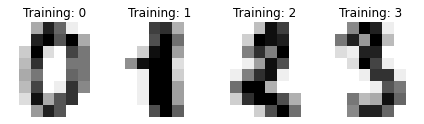

In [1]:
# load and visualize the dataset
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
%matplotlib inline

digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    plt.tight_layout()
    
X = digits.data
y = digits.target
target_names = digits.target_names


In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create a classifier: a Fisher's LDA classifier
lda = LinearDiscriminantAnalysis()

# Train lda on the first half of the digits

lda = lda.fit(X[:X.shape[0] // 2], y[:X.shape[0] // 2])


# Apply the tranformation to all the data (X) and name it X_r_lda

X_r_lda = lda.transform(X)

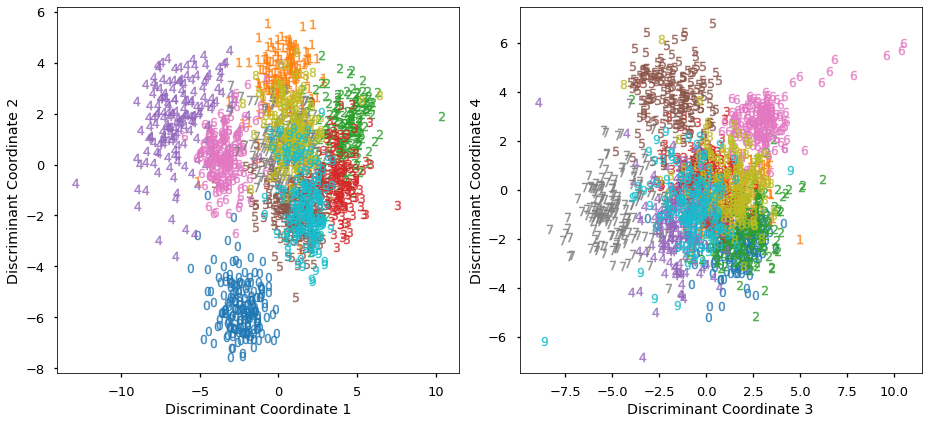

In [3]:
# Visualize transformed data on learnt discriminant coordinates
with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[13,6])
    for i, target_name in zip([0,1,2,3,4,5,6,7,8,9], target_names):
        axes[0].scatter(X_r_lda[y == i, 0], X_r_lda[y == i, 1], alpha=.8,
                        label=target_name, marker='$%.f$'%i)
        axes[1].scatter(X_r_lda[y == i, 2], X_r_lda[y == i, 3], alpha=.8,
                        label=target_name, marker='$%.f$'%i)
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate 2')
    axes[1].set_xlabel('Discriminant Coordinate 3')
    axes[1].set_ylabel('Discriminant Coordinate 4')
    plt.tight_layout()

In [5]:
# your code here

yhat = lda.predict(X[X.shape[0] // 2:])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y[X.shape[0] // 2:],yhat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.92      0.89      0.91        91
           2       0.97      0.91      0.94        86
           3       0.90      0.92      0.91        91
           4       0.99      0.90      0.94        92
           5       0.90      0.95      0.92        91
           6       0.95      0.99      0.97        91
           7       0.96      0.92      0.94        89
           8       0.90      0.83      0.86        88
           9       0.79      0.91      0.84        92

    accuracy                           0.92       899
   macro avg       0.92      0.92      0.92       899
weighted avg       0.92      0.92      0.92       899

